In [20]:
import os
import time
import numpy as np
import multiprocessing
from pylab import imshow, show
from timeit import default_timer as timer

In [2]:
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return max_iters

In [18]:
def create_fractal(min_x, max_x, min_y, max_y, image, width, start_idx, stop_idx, iters, event):
    event.wait()
    pid = os.getpid()
    
    print(f"PID {pid} starting with {stop_idx - start_idx} points")

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / (len(image) // width)
    
    for i in range(start_idx, stop_idx):
        x = i % width
        y = i // width
        
        real = min_x + x * pixel_size_x
        imag = min_y + y * pixel_size_y
        color = mandel(real, imag, iters)
        image[x + y * width] = color
    
    print(f"PID {pid} complete")

In [22]:
num_cores = 32
height = 10240
width = 15360
# image = np.zeros((1024, 1536), dtype = np.uint8)
image = multiprocessing.Array('B', height * width, lock=False)
pixels_per_core = len(image) // num_cores
start_event = multiprocessing.Event()

PID 33993 starting with 4915200 points
PID 33973 starting with 4915200 points
PID 33983 starting with 4915200 points
PID 33987 starting with 4915200 points
PID 33982 starting with 4915200 points
PID 33976 starting with 4915200 points
PID 33988 starting with 4915200 points
PID 33991 starting with 4915200 points
PID 33989 starting with 4915200 points
PID 33980 starting with 4915200 points
PID 33994 starting with 4915200 points
PID 33995 starting with 4915200 points
PID 33975 starting with 4915200 points
PID 33986 starting with 4915200 points
PID 33981 starting with 4915200 points
PID 33997 starting with 4915200 points
PID 33996 starting with 4915200 points
PID 33984 starting with 4915200 points
PID 33974 starting with 4915200 points
PID 33977 starting with 4915200 points
PID 33992 starting with 4915200 points
PID 33998 starting with 4915200 points
PID 33990 starting with 4915200 points
PID 33985 starting with 4915200 points
PID 33979 starting with 4915200 points
PID 34003 starting with 4

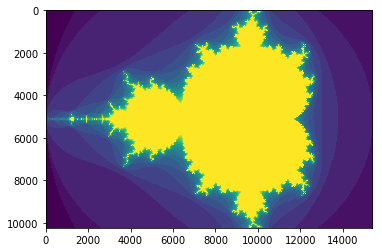

In [23]:
procs = []
for i in range(num_cores):
    start = i * pixels_per_core
    stop = start + pixels_per_core

    p = multiprocessing.Process(target=create_fractal, args=(-2.0, 1.0, -1.0, 1.0, image, width, start, stop, 20, start_event))
    p.start()
    procs.append(p)
    
time.sleep(5)

start = timer()
start_event.set()
for p in procs:
    p.join()
dt = timer() - start

print(f"Mandelbrot created in {dt} s")

image = np.reshape(image, (height, width))
imshow(image)
show()

In [15]:
print(multiprocessing.cpu_count())

40
